In [2]:
# linear regression model 
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

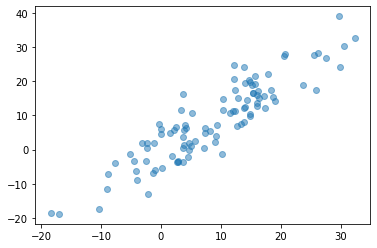

In [33]:
# dummy data point 
X = torch.randn(100,1)*10 + 10  # X for model training
y = X + torch.randn(100,1)*5   # y label

plt.scatter(X, y, alpha=0.5)

In [35]:
# linear model class definition
class LR_Model(nn.Module): 
    
    def __init__(self, inputDim, outputDim): 
        super(LR_Model, self).__init__()
        self.linear = nn.Linear(inputDim, outputDim)
    
    # y = wX + b    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [62]:
torch.manual_seed(1)
model = LR_Model(1, 1)
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [49]:
# preliminary test 
# x = torch.tensor([[1.0], [1.5], [3.5]])
# model.forward(x)

tensor([[0.0739],
        [0.3315],
        [1.3620]], grad_fn=<AddmmBackward>)

In [63]:
# function to get w, b
[w, b] = model.parameters()

def get_params(): 
    return (w[0][0].item(), b[0].item())

# gradient descent

In [64]:
learningRate = 0.001
epochs = 100 

# loss function (built-in)
criterion = nn.MSELoss
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [65]:
#training 
losses = [] 

for epoch in range(epochs):
    y_pred = model.forward(X)
    loss = criterion()(y_pred, y)
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    
    losses.append(loss)
    optimizer.zero_grad()  # set the gradient to zero
    loss.backward()         # compute the gradients wrt parameters
    optimizer.step()        # update parameters uing gradeint

epoch 0, loss 72.27426147460938
epoch 1, loss 44.343379974365234
epoch 2, loss 32.96444320678711
epoch 3, loss 28.328710556030273
epoch 4, loss 26.44013214111328
epoch 5, loss 25.670726776123047
epoch 6, loss 25.357275009155273
epoch 7, loss 25.229572296142578
epoch 8, loss 25.17754554748535
epoch 9, loss 25.156349182128906
epoch 10, loss 25.147714614868164
epoch 11, loss 25.14419174194336
epoch 12, loss 25.142759323120117
epoch 13, loss 25.142169952392578
epoch 14, loss 25.14193344116211
epoch 15, loss 25.141830444335938
epoch 16, loss 25.14179039001465
epoch 17, loss 25.141769409179688
epoch 18, loss 25.141759872436523
epoch 19, loss 25.141756057739258
epoch 20, loss 25.141752243041992
epoch 21, loss 25.141748428344727
epoch 22, loss 25.141748428344727
epoch 23, loss 25.141742706298828
epoch 24, loss 25.141742706298828
epoch 25, loss 25.141738891601562
epoch 26, loss 25.141738891601562
epoch 27, loss 25.141733169555664
epoch 28, loss 25.141733169555664
epoch 29, loss 25.1417293548584

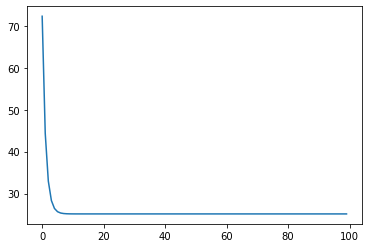

In [66]:
plt.plot(range(epochs), losses)

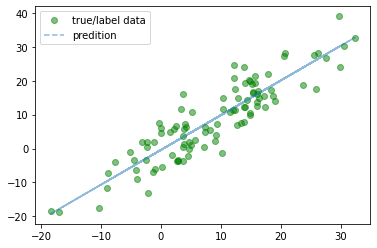

In [70]:
w1, b1 = get_params()

y_fit = w1*X + b1
plt.clf()
plt.plot(X, y, 'go', label='true/label data', alpha=0.5) 
plt.plot(X, y_fit, '--', label='predition', alpha=0.5)
plt.legend(loc='best')
plt.show()